In [3]:
import sympy as sympy 
from sympy import symbols
k, m, g, t = symbols('k m g t')  
from sympy import Function, Derivative, dsolve, Eq, sin, cos, symbols, classify_ode
from sympy import init_printing, sqrt, tanh, log
init_printing(use_latex=True)


Geschwindigkeitsgleichung:


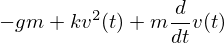

In [4]:
print("Geschwindigkeitsgleichung:")
v = Function('v')
free_fall2 = Derivative(v(t),t)*m + k* v(t)**2  - g*m 
display(free_fall2)

Meine Lösung mit dsolve:


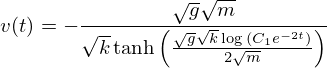

In [5]:
print("Meine Lösung mit dsolve:")
my_sol = dsolve(free_fall2)
display(my_sol)

Umstellen ergibt: 


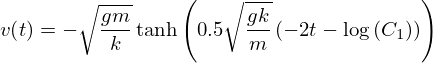

In [6]:
print("Umstellen ergibt: ")
C1 = symbols("C1")
my_sol1 = -sqrt(g*m/k) * tanh (0.5*sqrt(g*k/m) * (-2*t-log(C1)))
my2 = Eq(v(t),my_sol1)
display (my2)

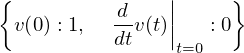

RuntimeError: maximum recursion depth exceeded

In [23]:
# Diese Zelle wird rausgenommen!

from sympy import Eq, Function, checkodesol, symbols
import sympy

def apply_ics(sol, ics, x, known_params):  # Lösung Anfangswertproblem
    """
    Apply the initial conditions (ics), given as a dictionary on
    the form ics = {y(0): y0: y(x).diff(x).subs(x, 0): yp0, ...}
    to the solution of the ODE with indepdendent variable x.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)
    
ics = {v(0):1, v(t).diff(t).subs(t, 0): 0}
display(ics)
v_t_sol = apply_ics(my2, ics, t,[k,g,m])
display(v_t_sol)   
print("Für C1 wird g eingesetzt")

Apply_ics Methode funktioniert für diese Gleichung nicht. Ersetzt man C1 mit g erhält man aber den richtigen Plot.

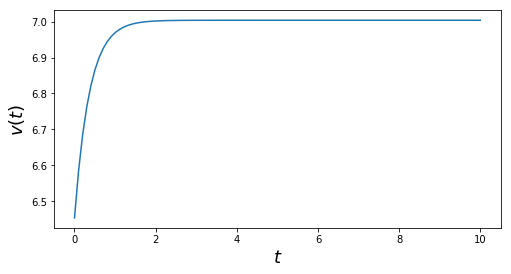

In [22]:
from numpy import linspace
import matplotlib.pyplot as plt
from sympy import symbols


fig, ax = plt.subplots(figsize=(8, 4))

x = linspace(0,10,100)
#print (x)

y = Function("y")
y = -sqrt(9.81*1/0.2) * tanh (0.5*sqrt(9.81*0.2/1) * (-2*t-log(9.81)))

ys = []
for g in x:
    l = y.subs(t,g)
    ys.append(l)

#print(ys)

plt.plot(x,ys)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$v(t)$", fontsize=18)
plt.show()